In [2]:
import omnipath as op
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pySankey import sankey as sn
import mellon as ml

In [3]:
db = op.interactions.import_intercell_network(transmitter_params = {"categories":"ligand"}, receiver_params = {"categories": "receptor"})
db = db[np.logical_not(db['genesymbol_intercell_source'].str.startswith('HLA'))]
db = db[np.logical_not(db['genesymbol_intercell_target'].str.startswith('HLA'))]
db = db[~db['genesymbol_intercell_target'].astype(str).str.startswith('COMPLEX')]
db = db[~db['genesymbol_intercell_source'].astype(str).str.startswith('COMPLEX')]
tgts_all = pd.read_csv('/Users/melis/Documents/Gene-targets/Disease_gene_associations_OpenTargets/hot-encoded-diseases.csv')

tgts_all['gene']=tgts_all['genes']
tgts = tgts_all.drop(columns=['genes']).set_index(['gene'])
tgts

AD  ALS  AnorexiaNervosa  BipolarDisorder  BrainAneurysm  \
gene                                                                 
AATK     0.0  0.0              0.0              0.0            0.0   
ABCA1    1.0  0.0              0.0              0.0            0.0   
ABCA13   0.0  0.0              0.0              0.0            0.0   
ABCA7    1.0  0.0              0.0              0.0            0.0   
ABCB1    0.0  0.0              0.0              0.0            0.0   
...      ...  ...              ...              ...            ...   
ZSCAN23  0.0  0.0              0.0              0.0            0.0   
ZSCAN26  0.0  0.0              0.0              0.0            0.0   
ZSCAN31  0.0  0.0              0.0              1.0            0.0   
ZSCAN9   0.0  0.0              0.0              1.0            0.0   
ZSWIM6   0.0  0.0              1.0              1.0            0.0   

         EssentialTremor  FrontotemporalDementia  IntracranialHemorrhage  LBD  \
gene                                                                            
AATK                 0.0                     0.0                     0.0  0.0   
ABCA1                0.0                     0.0                     0.0  0.0   
ABCA13               0.0                     0.0                     0.0  0.0   
ABCA7                0.0                     1.0                     0.0  0.0   
ABCB1                0.0                     0.0                     0.0  0.0   
...                  ...                     ...                     ...  ...   
ZSCAN23              0.0                     0.0                     0.0  0.0   
ZSCAN26              0.0                     0.0                     0.0  0.0   
ZSCAN31              0.0                     0.0                     0.0  0.0   
ZSCAN9               0.0                     0.0                     0.0  0.0   
ZSWIM6               0.0                     0.0                     0.0  0.0   

         MajorDepressiveDisorder  ...  Narcolepsy  NeuroticDisorder  OCD  \
gene                              ...                                      
AATK                         0.0  ...         0.0               1.0  0.0   
ABCA1                        0.0  ...         0.0               0.0  0.0   
ABCA13                       0.0  ...         0.0               0.0  0.0   
ABCA7                        0.0  ...         0.0               0.0  0.0   
ABCB1                        0.0  ...         0.0               0.0  0.0   
...                          ...  ...         ...               ...  ...   
ZSCAN23                      0.0  ...         0.0               0.0  0.0   
ZSCAN26                      1.0  ...         0.0               0.0  0.0   
ZSCAN31                      1.0  ...         0.0               0.0  0.0   
ZSCAN9                       0.0  ...         0.0               0.0  0.0   
ZSWIM6                       0.0  ...         0.0               0.0  1.0   

         PartialEpilepsy   PD  ProgressiveSupranuclearPalsy  RestlessLeg  \
gene                                                                       
AATK                 0.0  0.0                           0.0          0.0   
ABCA1                0.0  0.0                           0.0          0.0   
ABCA13               0.0  0.0                           0.0          0.0   
ABCA7                0.0  0.0                           0.0          0.0   
ABCB1                0.0  0.0                           0.0          0.0   
...                  ...  ...                           ...          ...   
ZSCAN23              0.0  0.0                           0.0          0.0   
ZSCAN26              0.0  0.0                           0.0          0.0   
ZSCAN31              0.0  0.0                           0.0          0.0   
ZSCAN9               0.0  0.0                           0.0          0.0   
ZSWIM6               0.0  0.0                           0.0          0.0   

         Schizophrenia  TouretteSyndrome  UnipolarDepression  
gene

In [4]:
source, percSrc, targets, percTgt, sum = ml.lr.find_hits(tgts, db)
tgts.drop('Empty', axis = 1, inplace = True)

LRs = db[['genesymbol_intercell_source','genesymbol_intercell_target']][(db['genesymbol_intercell_source'].isin(list(sum.gene))) | (db['genesymbol_intercell_target'].isin(list(sum.gene)))]

unique_genes = np.unique(list(LRs['genesymbol_intercell_source'])+list(LRs['genesymbol_intercell_target']))

#Make an empty pandas dataframe to populate with both risk LRs and direct connecting LRs without risk

risk_connectors = pd.DataFrame(np.zeros(shape=(len(unique_genes), len(tgts.columns))), columns=list(tgts.columns), index=unique_genes)


In [5]:
for n in range(0,len(tgts.columns)):
    disease_tgts = tgts[tgts.iloc[:,n]>0.0]
    disease_source, disease_percSrc, disease_targets, disease_percTgt, disease_sum = ml.lr.find_hits(disease_tgts, db)
    disease_LRs = db[['genesymbol_intercell_source','genesymbol_intercell_target']][(db['genesymbol_intercell_source'].isin(list(disease_sum.gene))) | (db['genesymbol_intercell_target'].isin(list(disease_sum.gene)))]
    disease_LRs_unique = pd.concat([disease_LRs['genesymbol_intercell_source'], disease_LRs['genesymbol_intercell_target']]).unique()
    for m in range(0,len(disease_LRs_unique)):
        print(disease_LRs_unique[m])
        print(risk_connectors.loc[disease_LRs_unique[m]])
        risk_connectors.iloc[risk_connectors.index.get_loc(disease_LRs_unique[m]), n] = 1.0
    

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


IL6R
AD                              0.0
ALS                             0.0
AnorexiaNervosa                 0.0
BipolarDisorder                 0.0
BrainAneurysm                   0.0
EssentialTremor                 0.0
FrontotemporalDementia          0.0
IntracranialHemorrhage          0.0
LBD                             0.0
MajorDepressiveDisorder         0.0
MigraineDisorder                0.0
MigraineWithAura                0.0
MS                              0.0
NarcolepsyCataplexy             0.0
Narcolepsy                      0.0
NeuroticDisorder                0.0
OCD                             0.0
PartialEpilepsy                 0.0
PD                              0.0
ProgressiveSupranuclearPalsy    0.0
RestlessLeg                     0.0
Schizophrenia                   0.0
TouretteSyndrome                0.0
UnipolarDepression              0.0
Name: IL6R, dtype: float64
HGF
AD                              0.0
ALS                             0.0
AnorexiaNervosa             

c:\Users\melis\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


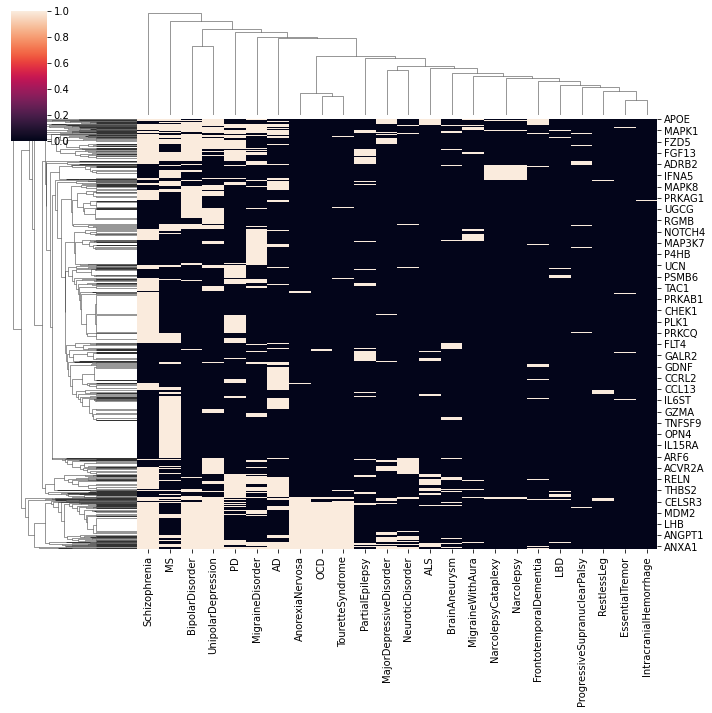

In [6]:
sns.clustermap(risk_connectors)
plt.savefig('plots/02-clustering_with_LR_partners/clustermap_binary_partners.png', dpi = 150)
plt.show()

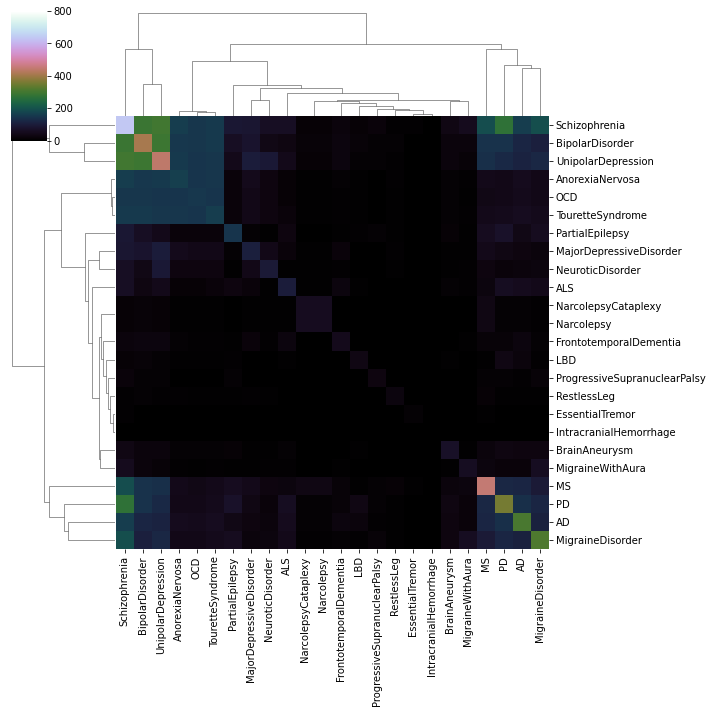

In [7]:
sns.clustermap(risk_connectors.T.dot(risk_connectors), cmap = 'cubehelix', vmax = 800)
plt.savefig('plots/02-clustering_with_LR_partners/clustermap_overlaps_LR_network.png', dpi = 150)
plt.show()

In [8]:
df = pd.read_csv('/Users/melis/Documents/Gene-targets/Disease_gene_associations_OpenTargets/hot-encoded-diseases.csv')
df = df.drop_duplicates(subset = ['genes'])
df = df.set_index('genes')

In [9]:
sns.clustermap((risk_connectors.T.dot(risk_connectors)/df.T.dot(df)).replace(to_replace = np.inf, value = 50).replace(np.nan, value = 0), cmap = 'cubehelix', vmax = 50)
plt.savefig('plots/02-clustering_with_LR_partners/clustermap_ratio_LRrisknetwork_diseaseriskassociation.png', dpi = 150)
plt.show()